In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [52]:
X_train = pd.read_csv('data/X_train.csv', index_col='id')
X_test = pd.read_csv('data/X_test.csv', index_col='id')
y_train = pd.read_csv('data/y_train.csv', index_col='id')

In [53]:
display(X_train)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,14/03/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,06/03/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,25/02/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,28/01/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,13/07/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10.0,03/05/2013,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
27263,4700.0,07/05/2011,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
37057,0.0,11/04/2011,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump


In [54]:
display(X_train.columns)

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [55]:
display(X_train[['amount_tsh', 'scheme_management']])

,amount_tsh,scheme_management
id,,
69572,6000.0,VWC
8776,0.0,Other
34310,25.0,VWC
67743,0.0,VWC
19728,0.0,NaN
...,...,...
60739,10.0,Water Board
27263,4700.0,VWC
37057,0.0,VWC


In [56]:
display(y_train)

,status_group
id,
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional
...,...
60739,functional
27263,functional
37057,functional


In [57]:
df = X_train.join(y_train)

In [58]:
quantitative = pd.concat(
    [df.status_group, 
     df.status_group.replace(
         {'functional': 1, 'non functional': 0, 'functional needs repair': 0.5})
    ], axis=1)
quantitative.columns=['status_group', 'status_group_code']
display(quantitative)

,status_group,status_group_code
id,,
69572,functional,1.0
8776,functional,1.0
34310,functional,1.0
67743,non functional,0.0
19728,functional,1.0
...,...,...
60739,functional,1.0
27263,functional,1.0
37057,functional,1.0


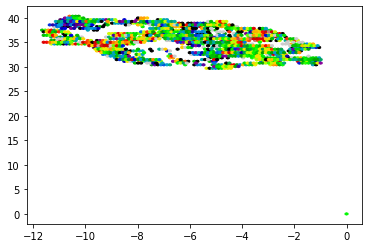

In [50]:
cmap=plt.cm.Spectral
norm = plt.Normalize(vmin=0, vmax=1)
plt.hexbin(df.latitude, df.longitude, C=quantitative.status_group_code,
            norm = plt.Normalize(vmin=0, vmax=1),
            cmap='nipy_spectral')

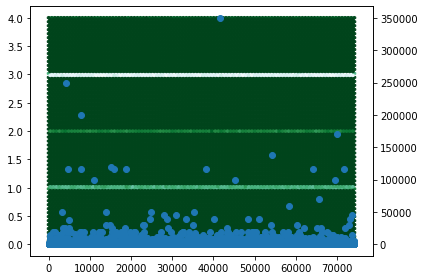

In [27]:
quantity_quantitative = df.quantity.replace(
    {'unknown': 4, 'enough': 3, 'seasonal': 2, 'insufficient': 1, 'dry': 0})

x, y1 = plt.subplots()
y1.hexbin(df.index,quantity_quantitative, cmap=plt.cm.BuGn_r)
y2=y1.twinx()
y2.scatter(df.index,df.amount_tsh)
x.tight_layout()
plt.show()